# 3.1 Edge detection -- Operators based on the first derivative

Edge detection is an image processing technique for finding those points in images that represent brightness variations or *edges*. It has many applications for image segmentation and data extraction that will be explained posteriorly in this course.  

However, finding edges properly is not a straightforward task, as there exist different errors that can appear when applying edge detection techniques:

<img src="./images/edge_errors.jpg" width="400">

During these chapters, you are going to test and implement different edge detection methods, which are based in convolution, discovering their pros and cons.

In this notebook, **first-derivative** based operators will be covered. This includes:

- Discrete approximations of a gradient operator
- The DroG operator

## Problem context - Edge detection for medical images

Edge detection in medical images is of capital importance for diagnosis of different diseases (e.g., cancer) in human organs such as lungs and the prostate, becoming an essential pre-processing step in medical image segmentation.

<img src="./images/hospital_clinico.jpg" width="400">

In this context, *Hospital Clínico*, a very busy hospital in Málaga is asking local engineering students to join their research team. They are looking for a person with knowledge in image processin and, in order to ensure it, they have published 3 medical images: `medical_1.jpg`, `medical_2.jpg` and `medical_3.jpg`.  It is asked to make accurate edge detection in the three images, as well as to provide an explanation of how it was made.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

images_path = './images/'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


To solve this, we are going to use plenty edge detection methods, which will be tested and compared in order to determine the best option.

**<span style="color:red">EXERCISE 3.1.1 -- </span>** First, **display the provided images** in a 1x3 plot to see what are we dealing with.

*As medical images does not provide color information, we are going to use border detection in greyscale images.  
There are different techniques for color image edge detection, like converting to YCrCb color space (appendix 2), or detecting edges on each RGB channel.*

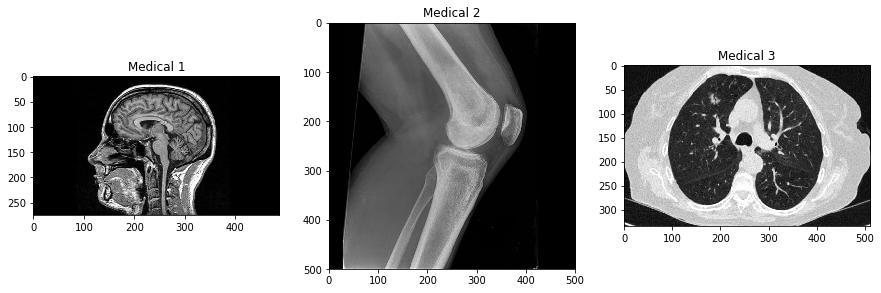

In [13]:
# EX_3.1.1
# Display the provided images in a 1x3 plot to see what are we dealing with

# Write your code here!

### Discrete approximations of a gradient operator

Now, we are going to apply simple edge detection methods that acts as discrete approximations of a **gradient operator**, which determines the increase or decrease (and the direction) of the grey level throughout the image.
These methods are based on convolutions and employ different kernels to achieve its purpose.

An example of this is the **Sobel operator**. This method uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical ones.$\\[5pt]$

$$S_x=\frac{1}{4}\left(\begin{matrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{matrix} \right) \; \;S_y= \frac{1}{4}\left(\begin{matrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{matrix} \right) \\[20pt]$$

In this way, it is possible to obtain the gradient of the image:$\\[5pt]$ $$ \nabla I(x,y)= \begin{bmatrix} I \otimes S_x \\ I \otimes S_y \end{bmatrix}$$

**<span style="color:red">EXERCISE 3.1.2 -- </span>** Read one of the images, compute both kernel derivatives and apply them to the image (separately). Finally, display in a 1x3 plot the original image together with the horizontal and vertical derivative images.

*Notice that the derivative image values can be positive **and negative**, caused by the negative values in the kernel. This implies that the desired depth of the destination image (`ddepth`) has to be at least a signed data type when calling to the `filter2D` method.*

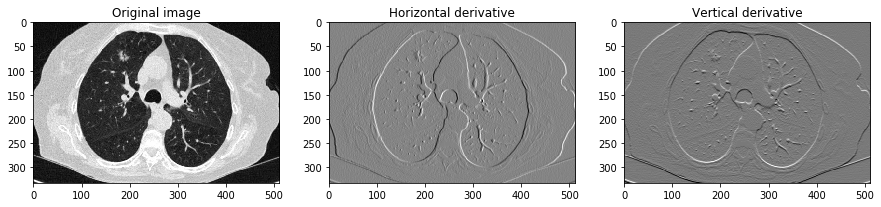

In [12]:
# EX_3.1.2
# Read one of the images, compute both kernel derivatives, apply them to the image (separately) and display the original image and the derivatives in a 1x3 plot.
# Write your code here!

Once we have computed both derivative images $S_x$ and $S_y$, we can determine the complete edge image by computing the image gradient magnitude and then binarizing the result:

$$|\nabla I(x,y)| = \sqrt{(I \otimes S_x)^2 + (I \otimes S_y)^2} \approx |I \otimes S_x| + |I \otimes S_y|$$

**<span style="color:red">EXERCISE 3.1.3 -- </span>** Implement a function called **edge_detection_chart** that computes the gradient image of `image` using `kernel_h` and `kernel_v` (kernels for horizontal and vertical derivatives) and **binarize** the resultant image (final edges image) using `threshold`. Then display the `image`, the gradient image and the final edge image in a 1x3 plot.

*Tip: you should [normalize](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html) the gradient image before thresholding.*

In [14]:
# EX_3.1.3
# Implement a function that that computes the gradient of an image, taking also as input the convolution kernels.
# Show the input image, the gradient image (normalized) and the binarized image in a 1x3 plot.
def edge_detection_chart(image, kernel_h, kernel_v, threshold):
    """ Computed the gradient of the image, binarizes and display it.   
    
        Args:
            image: Input image
            kernel_h: kernel for horizontal derivative
            kernel_v: kernel for vertical derivative
            threshold: threshold value for binarization
    """
    # Write your code here!

**<span style="color:red">EXERCISE 3.1.4 -- </span>** Try this method with different size Sobel kernels (3x3, 5x5, ...) and with other operators (Roberts, Prewitt, ...). $\\[5pt]$  
After that, **answer following questions**:

- What happens if we use a bigger kernel?
- There are differences between Sobel and other operators?
- What errors appear using those operators?
- Why kernels usually are divided by a number? (e.g. 3x3 Sobel is divided by 4)

**<span style="color:blue">(Answer these questions here!)</span>**

In [25]:
# EX_3.1.4
# Read the image, set you kernels (Sobel, Roberts, Prewitt, etc.) and interact with the threshold parameter.
# Write your code here!

# Define kernel (Sobel, Roberts, Prewitt, ...)
# kernel_h = ...
# kernel_v = ...

# and interact with the threshold!
interact( edge_detection_chart, image=fixed(image), kernel_h=fixed(kernel_h), kernel_v=fixed(kernel_v), threshold=(0,255,10))

interactive(children=(IntSlider(value=120, description='threshold', max=255, step=10), Output()), _dom_classes…

<function __main__.edge_detection_chart>

### The DroG operator

Now, the **DroG operator** (Derivative of Gaussian) is going to be implemented.

Something similar as gaussian smoothing vs neighborhood averaging happens on edge detection. Instead of using predefined kernels, it is possible to derivate the gaussian function. This way, we get a kernel that applies smoothing and edge detection (preserving edges as we use gaussian distribution) at the same time.

$\hspace{8cm}$2-D gaussian:  
$$g_{\sigma}(x,y) = \frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)\\[20pt]$$
$\hspace{8cm}$2-D DroG:
$$DroG(x,y) = \nabla \left[ g_\sigma (x,y) \right] = \begin{bmatrix} \frac{-xg_\sigma(x,y)}{\sigma^2} \\ \frac{-yg_\sigma(x,y)}{\sigma^2}\end{bmatrix}$$

**<span style="color:red">EXERCISE 3.1.5 -- </span>** Complete the function **gaussian_kernel** that builds the DroG templates (both horizontal and vertical) according to a certain kernel size (input). Finally, it calls to *edge_detection_chart* using that templates. The input is an image, the kernel aperture size, the Gaussian standard deviation and the threshold for the gradient image binarization.


In [27]:
# EX_3.1.5
# Implement a function that builds the horizontal and vertical DroG templates and calls to 'edge_detection_chart' using that templates. 
# Inputs: an image, the kernel aperture size, the Gaussian standard deviation and the threshold for the gradient image binarization
def gaussian_kernel(image, w_kernel, sigma, threshold):
    """ Construct the DroG operator and call edge_detection_chart.   
    
        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: Standard deviation of the Gaussian distribution
            threshold: Threshold value for binarization
    """
    # Write your code here!

**What to do?** Try this method and play with interactive parameters.$\\[5pt]$      
After that, **answer following questions**:

- What happens if a bigger kernel is used?
- What kind of errors appear and disappear whenever sigma is modified?
- Why gradient image have lower values than original image? *Tip: [image normalization](https://stackoverflow.com/questions/40645985/opencv-python-normalize-image/42164670)* 

**<span style="color:blue">(Answer these questions here!)</span>**

In [28]:
# Read the image
image = cv2.imread(images_path + 'medical_3.jpg', 0)

# Interact with the three input parameters
interact(gaussian_kernel, image=fixed(image), w_kernel=(1,5,1), sigma=(0.4,5,0.5), threshold=(0,255,10))

interactive(children=(IntSlider(value=3, description='w_kernel', max=5, min=1), FloatSlider(value=2.4, descrip…

<function __main__.gaussian_kernel>

## Conclusion

Perfect! In this notebook you have

- learnt basic operators for edge detection.
- learnt how to construct a DroG kernel.
- played a bit with these first-derivative-based edge detection methods in the context of medical images, discovering some real and important utilities.